In [1]:
from itertools import islice

import tables as tb
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt

tbf = tb.open_file("/global/scratch/ryee/symbol_count/agg_count.h5", "a")
table = tbf.root.count_table

In [2]:
len(table)

9953186

In [5]:
rows = table.iterrows()
rows

  /count_table (Table(9953186,)) ''
 You will normally want to use this object in iterator contexts.

In [6]:
[(row['symbol_root'], row['count']) for row in islice(rows,5)]


[(b'OOK   ', 4939),
 (b'SUTR  ', 2652),
 (b'FSIN  ', 14228),
 (b'MPG   ', 36869),
 (b'CLWR  ', 55395)]

In [ ]:
# let's try reading the 

In [7]:
tbf.close()

before indexing of columns:

```
ls -lt ~/gscratch/symbol_count/agg_count.h5
-rw-r--r-- 1 ryee ucb 139474786 Jul 26 10:32 /global/home/users/ryee/gscratch/symbol_count/agg_count.h5
```

In [ ]:
# index
# index1 = table.cols.date.create_index()

In [ ]:
# read the first couple of rows (like df.head)

# naive:  read all the data into memory

In [8]:
tbf = tb.open_file("/global/scratch/ryee/symbol_count/agg_count.h5", "a")
table = tbf.root.count_table.read()

In [12]:
table['count'].sum()

851562577807

## even use pandas

In [14]:
df = DataFrame(table)
df.head()

,symbol_root,count,date
0,b'OOK ',4939,1271908800
1,b'SUTR ',2652,1271908800
2,b'FSIN ',14228,1271908800
3,b'MPG ',36869,1271908800
4,b'CLWR ',55395,1271908800


In [16]:
df["count"].sum()

851562577807

In [25]:
cdf = DataFrame(df["date"].value_counts(), columns=['c'])
cdf['ts']= cdf.index
cdf.head()

,c,ts
1433995200,7582,1433995200
1434081600,7579,1434081600
1434340800,7579,1434340800
1433908800,7568,1433908800
1433476800,7564,1433476800


In [22]:
%matplotlib inline

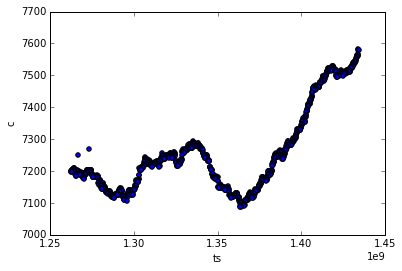

In [26]:
cdf.plot(x='ts', y='c', kind='scatter')